/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Acurácia do modelo: 0.5416666666666666
Relatório de Classificação:
               precision    recall  f1-score   support

     Herding       0.57      0.67      0.62         6
       Hound       0.40      0.57      0.47         7
Non-Sporting       0.20      0.20      0.20         5
    Sporting       0.75      0.75      0.75         8
    Standard       0.00      0.00      0.00         1
     Terrier       0.60      0.38      0.46         8
         Toy       0.33      0.67      0.44         3
     Working       0.86      0.60      0.71        10

    accuracy                           0.54        48
   macro avg       0.46      0.48      0.46        48
weighted avg       0.57      0.54      0.54        48



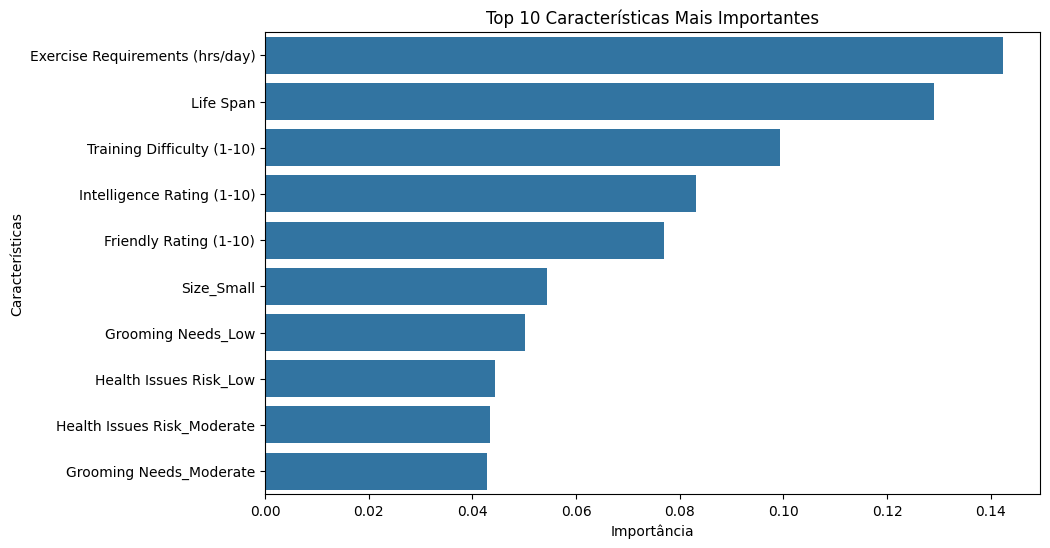

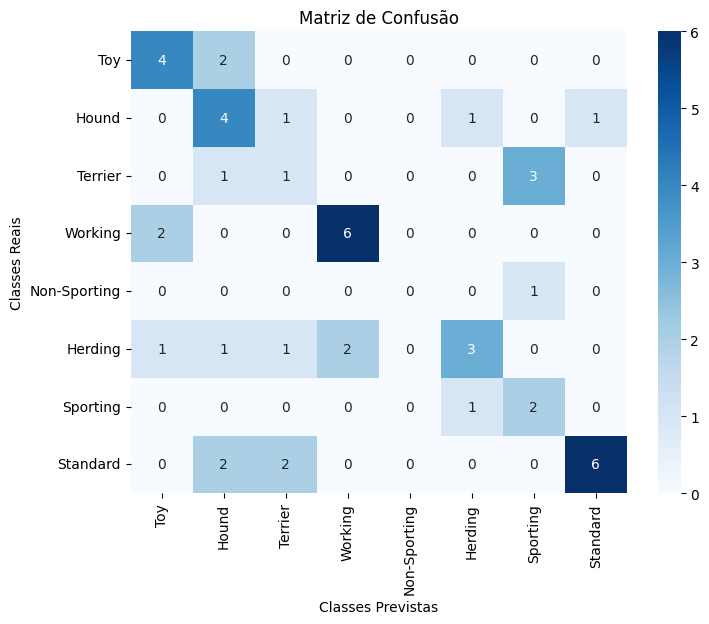

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

dados_racas_cachorros = pd.read_csv('/content/Dog Breads Around The World.csv')

# Pré-processamento: Codificação e Normalização
colunas_categoricas = ['Size', 'Grooming Needs', 'Good with Children', 'Shedding Level', 'Health Issues Risk']
colunas_numericas = ['Friendly Rating (1-10)', 'Life Span', 'Exercise Requirements (hrs/day)',
                     'Intelligence Rating (1-10)', 'Training Difficulty (1-10)']

dados_codificados = pd.get_dummies(dados_racas_cachorros, columns=colunas_categoricas, drop_first=True)
escalador = StandardScaler()
dados_codificados[colunas_numericas] = escalador.fit_transform(dados_codificados[colunas_numericas])

# Definir variáveis de entrada e saída
X_entradas = dados_codificados.drop(columns=['Name', 'Origin', 'Type', 'Unique Feature', 'Average Weight (kg)'], errors='ignore')
y_saida = dados_racas_cachorros['Type']

# Dividir em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X_entradas, y_saida, test_size=0.3, random_state=42)

# Inicializar e treinar o classificador RandomForest
classificador_rf = RandomForestClassifier(random_state=42)
classificador_rf.fit(X_treino, y_treino)

# Predições no conjunto de teste
y_predicoes = classificador_rf.predict(X_teste)

# Avaliação do modelo
acuracia = accuracy_score(y_teste, y_predicoes)
relatorio_classificacao = classification_report(y_teste, y_predicoes)

print(f"Acurácia do modelo: {acuracia}")
print("Relatório de Classificação:\n", relatorio_classificacao)

# Gráficos
# Importância das Features
importancias = pd.DataFrame({
    'Feature': X_entradas.columns,
    'Importance': classificador_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Gráfico 1: Importância das Features
plt.figure(figsize=(10, 6))
sns.barplot(data=importancias.head(10), x='Importance', y='Feature')
plt.title('Top 10 Características Mais Importantes')
plt.xlabel('Importância')
plt.ylabel('Características')
plt.show()

# Gráfico 2: Matriz de Confusão
cm = confusion_matrix(y_teste, y_predicoes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=y_saida.unique(), yticklabels=y_saida.unique())
plt.title('Matriz de Confusão')
plt.xlabel('Classes Previstas')
plt.ylabel('Classes Reais')
plt.show()

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset traduzido
dados_racas_cachorros = pd.read_csv('/content/Dataset_Racas_Caes_Traduzido.csv')

# Pré-processamento: Ajustar os nomes das colunas categóricas e numéricas para o português
colunas_categoricas = [
    'Tamanho',
    'Necessidade de Cuidados',
    'Bom com Crianças',
    'Nível de Queda de Pelo',
    'Risco de Problemas de Saúde'
]
colunas_numericas = [
    'Avaliação de Amizade (1-10)',
    'Expectativa de Vida',
    'Exigências de Exercício (hrs/dia)',
    'Avaliação de Inteligência (1-10)',
    'Dificuldade de Treinamento (1-10)'
]

# Codificar variáveis categóricas
dados_codificados = pd.get_dummies(dados_racas_cachorros, columns=colunas_categoricas, drop_first=True)

# Normalizar variáveis numéricas
escalador = StandardScaler()
dados_codificados[colunas_numericas] = escalador.fit_transform(dados_codificados[colunas_numericas])

# Definir variáveis de entrada e saída
X_entradas = dados_codificados.drop(columns=['Nome', 'Origem', 'Tipo', 'Característica Única', 'Peso Médio (kg)'], errors='ignore')
y_saida = dados_racas_cachorros['Tipo']

# Dividir em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X_entradas, y_saida, test_size=0.3, random_state=42)

# Inicializar e treinar o classificador RandomForest
classificador_rf = RandomForestClassifier(random_state=42)
classificador_rf.fit(X_treino, y_treino)

# Predições no conjunto de teste
y_predicoes = classificador_rf.predict(X_teste)

# Avaliação do modelo
acuracia = accuracy_score(y_teste, y_predicoes)
relatorio_classificacao = classification_report(y_teste, y_predicoes)

print(f"Acurácia do modelo: {acuracia}")
print("Relatório de Classificação:\n", relatorio_classificacao)

# Importância das Features
importancias = pd.DataFrame({
    'Feature': X_entradas.columns,
    'Importance': classificador_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)



Acurácia do modelo: 0.5208333333333334
Relatório de Classificação:
               precision    recall  f1-score   support

     Herding       0.57      0.67      0.62         6
       Hound       0.27      0.43      0.33         7
Non-Sporting       0.25      0.20      0.22         5
    Sporting       0.83      0.62      0.71         8
    Standard       0.00      0.00      0.00         1
     Terrier       0.60      0.38      0.46         8
         Toy       0.33      0.67      0.44         3
     Working       0.78      0.70      0.74        10

    accuracy                           0.52        48
   macro avg       0.45      0.46      0.44        48
weighted avg       0.56      0.52      0.53        48



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


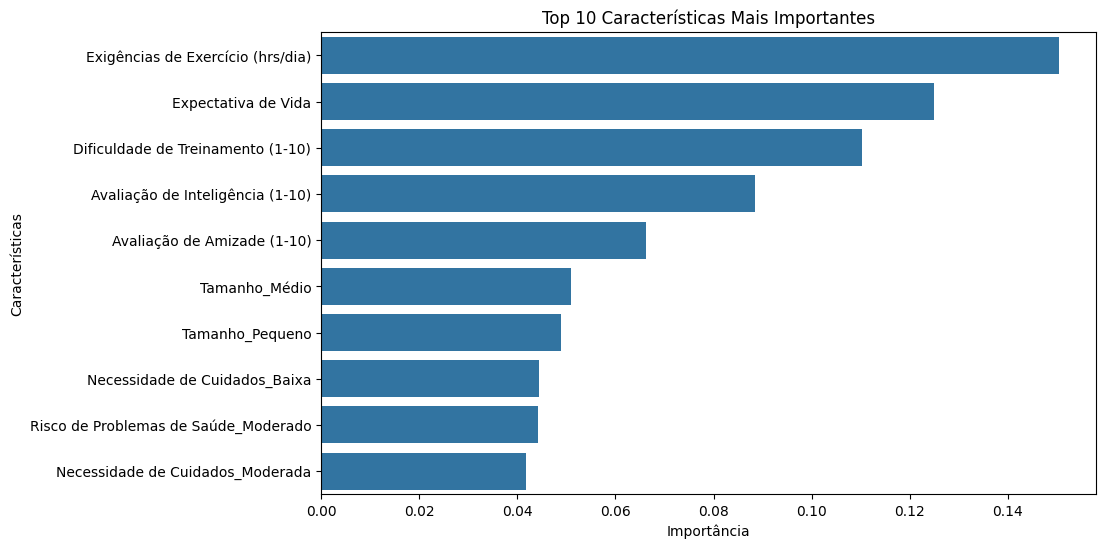

In [15]:
# Gráfico de Importância das Features
plt.figure(figsize=(10, 6))
sns.barplot(data=importancias.head(10), x='Importance', y='Feature')
plt.title('Top 10 Características Mais Importantes')
plt.xlabel('Importância')
plt.ylabel('Características')
plt.show()


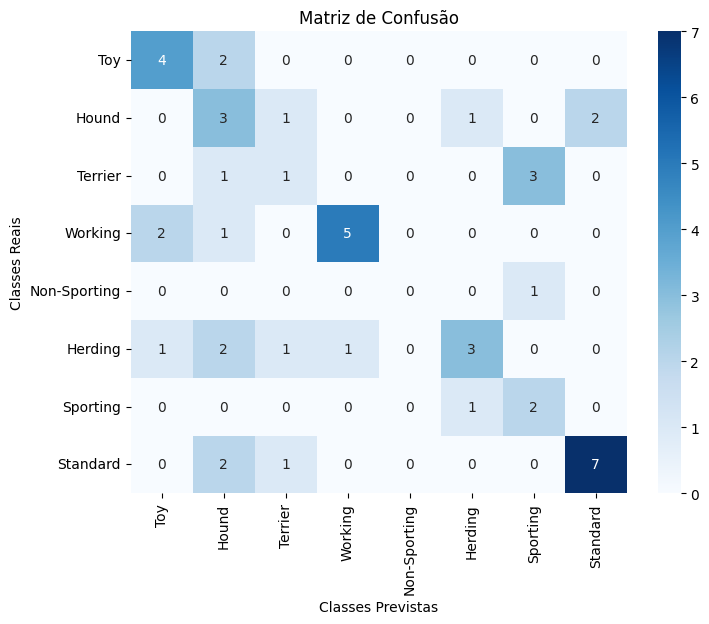

In [16]:

# Gráfico 2: Matriz de Confusão
cm = confusion_matrix(y_teste, y_predicoes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=y_saida.unique(), yticklabels=y_saida.unique())
plt.title('Matriz de Confusão')
plt.xlabel('Classes Previstas')
plt.ylabel('Classes Reais')
plt.show()

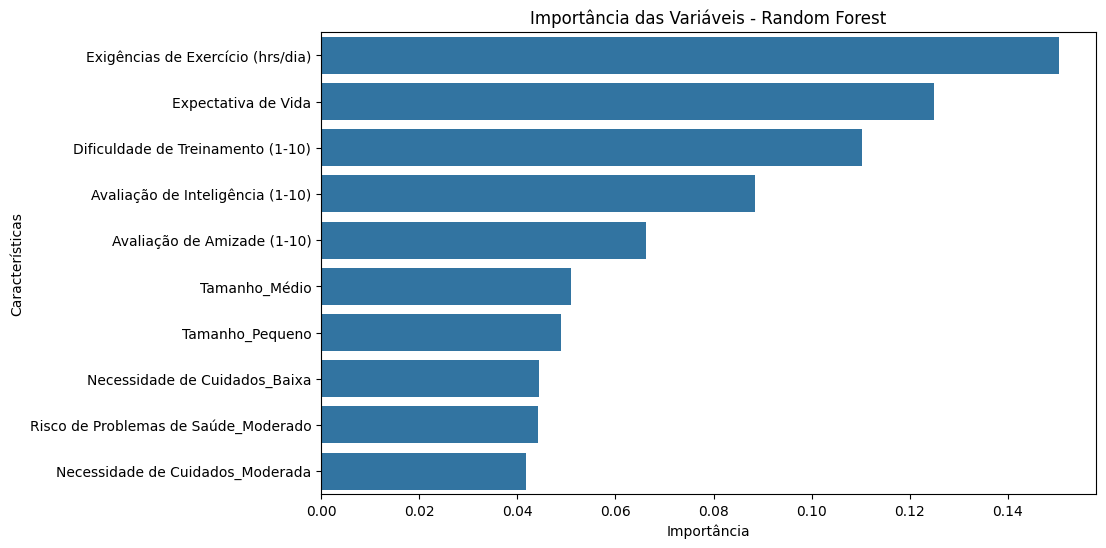

Treinando K-Nearest Neighbors (KNN)...


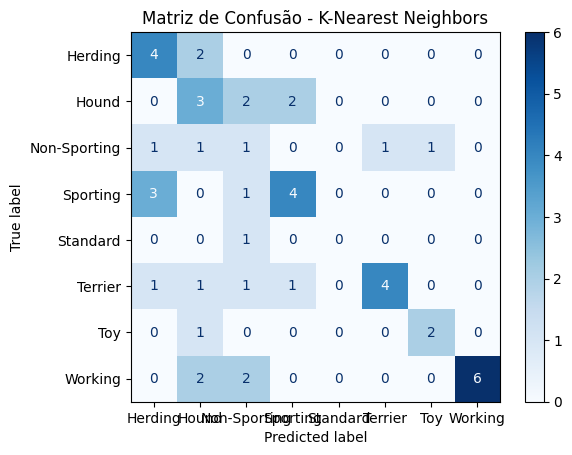

Treinando Regressão Logística...


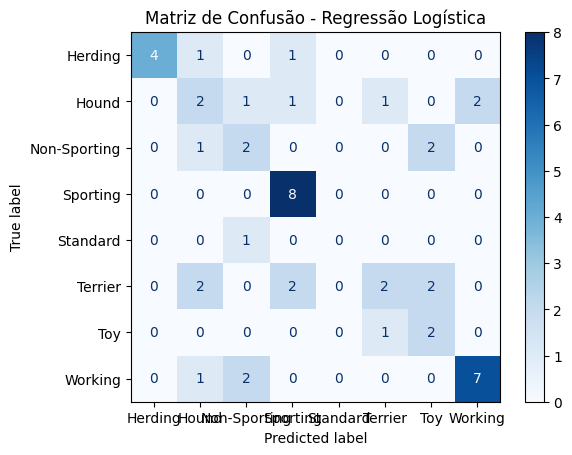


Modelo: K-Nearest Neighbors
Acurácia: 0.5000
Relatório de Classificação:
              precision    recall  f1-score   support

     Herding       0.44      0.67      0.53         6
       Hound       0.30      0.43      0.35         7
Non-Sporting       0.12      0.20      0.15         5
    Sporting       0.57      0.50      0.53         8
    Standard       0.00      0.00      0.00         1
     Terrier       0.80      0.50      0.62         8
         Toy       0.67      0.67      0.67         3
     Working       1.00      0.60      0.75        10

    accuracy                           0.50        48
   macro avg       0.49      0.45      0.45        48
weighted avg       0.59      0.50      0.52        48


Modelo: Regressão Logística
Acurácia: 0.5625
Relatório de Classificação:
              precision    recall  f1-score   support

     Herding       1.00      0.67      0.80         6
       Hound       0.29      0.29      0.29         7
Non-Sporting       0.33      0.40     

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

# Lista para armazenar resultados
resultados = []

# Função para treinar e avaliar um modelo
def avaliar_modelo(nome_modelo, modelo, X_treino, X_teste, y_treino, y_teste):
    modelo.fit(X_treino, y_treino)
    y_predicoes = modelo.predict(X_teste)
    acuracia = accuracy_score(y_teste, y_predicoes)
    relatorio = classification_report(y_teste, y_predicoes, zero_division=0)
    resultados.append((nome_modelo, acuracia, relatorio))

    # Matriz de confusão
    disp = ConfusionMatrixDisplay.from_estimator(modelo, X_teste, y_teste, cmap='Blues', values_format='d')
    disp.ax_.set_title(f'Matriz de Confusão - {nome_modelo}')
    plt.show()

    return modelo

# Gráfico de Importância das Features para Random Forest
importancias_rf = pd.DataFrame({
    'Feature': X_entradas.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importancias_rf.head(10), x='Importance', y='Feature')
plt.title('Importância das Variáveis - Random Forest')
plt.xlabel('Importância')
plt.ylabel('Características')
plt.show()

# Modelo 2: K-Nearest Neighbors (KNN)
print("Treinando K-Nearest Neighbors (KNN)...")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model = avaliar_modelo("K-Nearest Neighbors", knn_model, X_treino, X_teste, y_treino, y_teste)

# Modelo 3: Regressão Logística
print("Treinando Regressão Logística...")
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model = avaliar_modelo("Regressão Logística", lr_model, X_treino, X_teste, y_treino, y_teste)

# Exibir resultados
for nome, acuracia, relatorio in resultados:
    print(f"\nModelo: {nome}")
    print(f"Acurácia: {acuracia:.4f}")
    print("Relatório de Classificação:")
    print(relatorio)


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Carregar o dataset
dados_racas_cachorros = pd.read_csv('/content/Dataset_Racas_Caes_Traduzido.csv')

# Pré-processamento
colunas_categoricas = [
    'Tamanho',
    'Necessidade de Cuidados',
    'Bom com Crianças',
    'Nível de Queda de Pelo',
    'Risco de Problemas de Saúde'
]
colunas_numericas = [
    'Avaliação de Amizade (1-10)',
    'Expectativa de Vida',
    'Exigências de Exercício (hrs/dia)',
    'Avaliação de Inteligência (1-10)',
    'Dificuldade de Treinamento (1-10)'
]

dados_codificados = pd.get_dummies(dados_racas_cachorros, columns=colunas_categoricas, drop_first=True)
escalador = StandardScaler()
dados_codificados[colunas_numericas] = escalador.fit_transform(dados_codificados[colunas_numericas])

X_entradas = dados_codificados.drop(columns=['Nome', 'Origem', 'Tipo', 'Característica Única', 'Peso Médio (kg)'], errors='ignore')
y_saida = dados_racas_cachorros['Tipo']

X_treino, X_teste, y_treino, y_teste = train_test_split(X_entradas, y_saida, test_size=0.3, random_state=42)

# Função para avaliar e gerar gráficos detalhados
def avaliar_modelo(nome_modelo, modelo, X_treino, X_teste, y_treino, y_teste, importancias=None):
    modelo.fit(X_treino, y_treino)
    y_predicoes = modelo.predict(X_teste)
    acuracia = accuracy_score(y_teste, y_predicoes)
    relatorio = classification_report(y_teste, y_predicoes, zero_division=0)

    # Matriz de Confusão
    plt.figure(figsize=(12, 8))
    cm = confusion_matrix(y_teste, y_predicoes)
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu",
                xticklabels=np.unique(y_teste), yticklabels=np.unique(y_teste))
    plt.title(f"Matriz de Confusão Detalhada - {nome_modelo}", fontsize=16)
    plt.xlabel("Classes Previstas", fontsize=14)
    plt.ylabel("Classes Reais", fontsize=14)
    plt.show()

    # Importância das Variáveis (somente para Random Forest)
    if importancias is not None:
        plt.figure(figsize=(12, 8))
        sns.barplot(data=importancias.head(10), x="Importance", y="Feature", palette="viridis")
        plt.title(f"Importância das Variáveis - {nome_modelo}", fontsize=16)
        plt.xlabel("Importância", fontsize=14)
        plt.ylabel("Características", fontsize=14)
        plt.show()

    return acuracia, relatorio

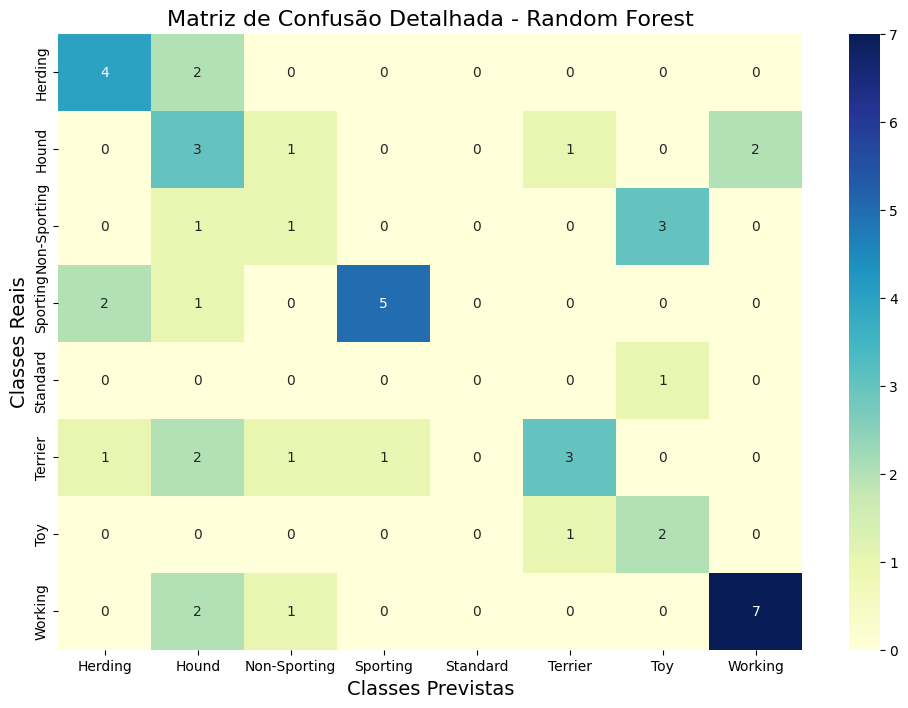

<ipython-input-25-0ff0d2026d29>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importancias.head(10), x="Importance", y="Feature", palette="viridis")


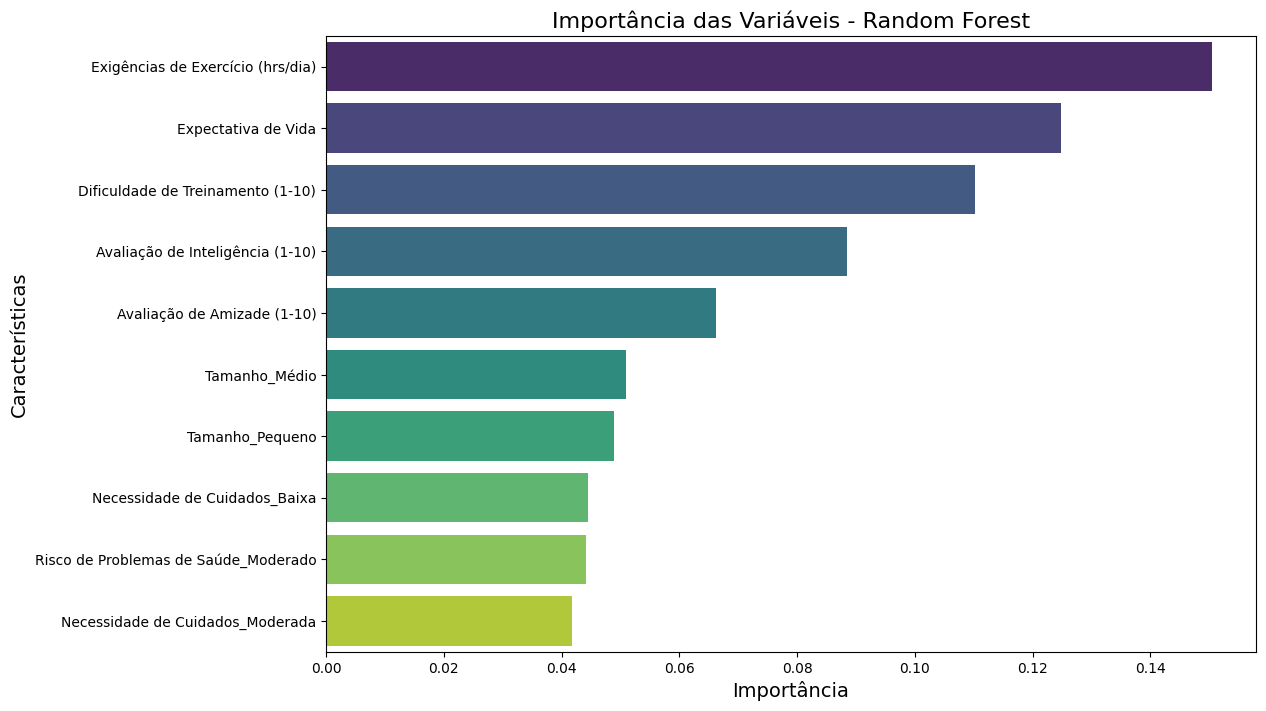

In [26]:
# Modelo 1: Random Forest
rf_model = RandomForestClassifier(random_state=42)
importancias_rf = pd.DataFrame({
    'Feature': X_entradas.columns,
    'Importance': rf_model.fit(X_treino, y_treino).feature_importances_
}).sort_values(by='Importance', ascending=False)
rf_acuracia, rf_relatorio = avaliar_modelo("Random Forest", rf_model, X_treino, X_teste, y_treino, y_teste, importancias_rf)

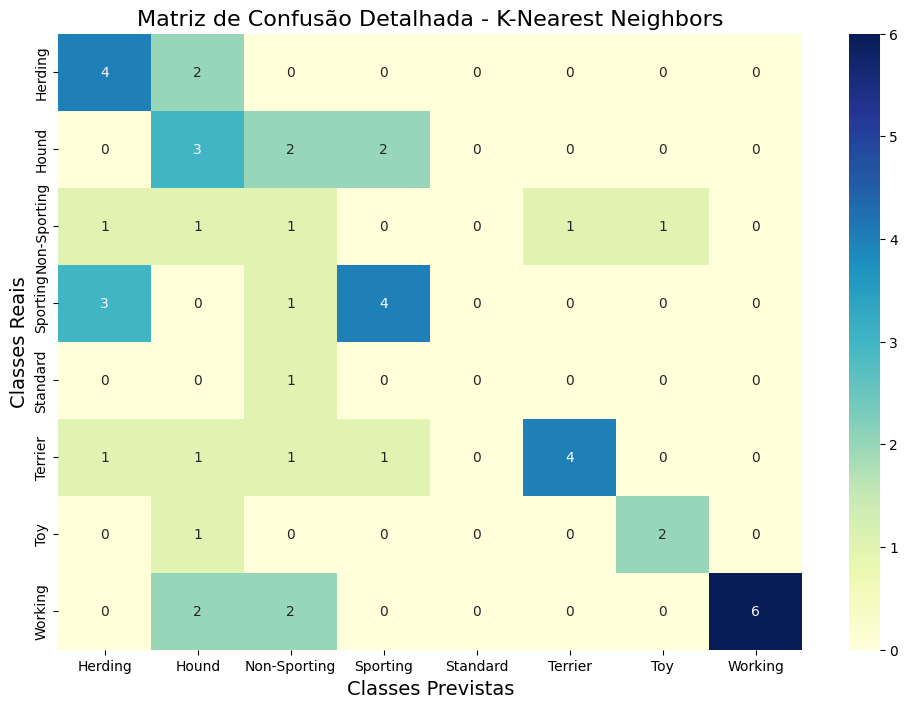

In [27]:
# Modelo 2: K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_acuracia, knn_relatorio = avaliar_modelo("K-Nearest Neighbors", knn_model, X_treino, X_teste, y_treino, y_teste)

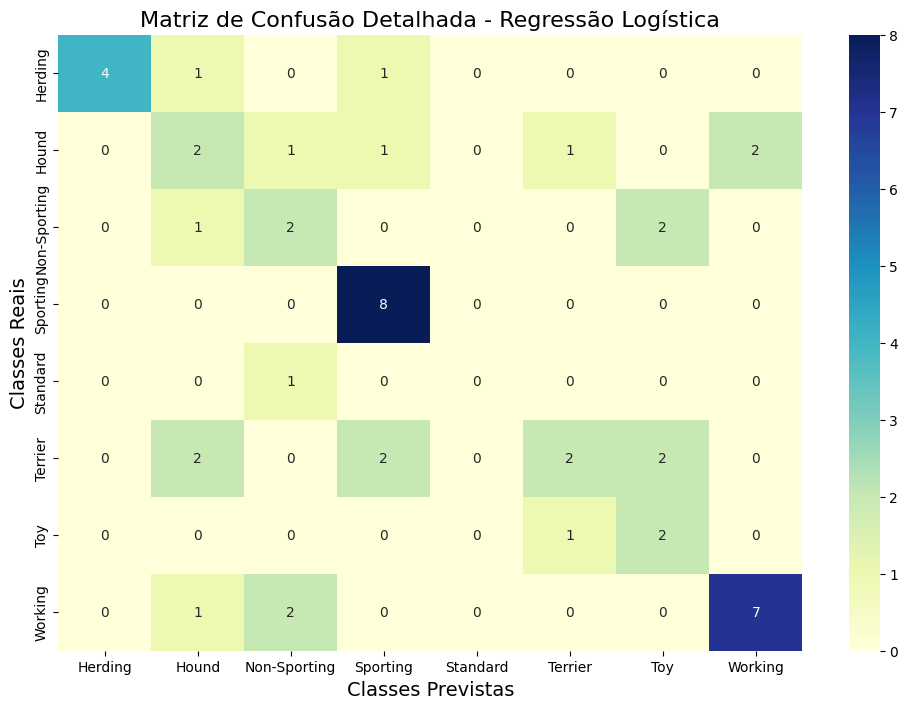

In [29]:

# Modelo 3: Regressão Logística
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_acuracia, lr_relatorio = avaliar_modelo("Regressão Logística", lr_model, X_treino, X_teste, y_treino, y_teste)

In [28]:
# Exibir resultados
print("\nResultados Finais:\n")
print(f"Random Forest - Acurácia: {rf_acuracia:.4f}\n{rf_relatorio}")
print(f"K-Nearest Neighbors - Acurácia: {knn_acuracia:.4f}\n{knn_relatorio}")
print(f"Regressão Logística - Acurácia: {lr_acuracia:.4f}\n{lr_relatorio}")


Resultados Finais:

Random Forest - Acurácia: 0.5208
              precision    recall  f1-score   support

     Herding       0.57      0.67      0.62         6
       Hound       0.27      0.43      0.33         7
Non-Sporting       0.25      0.20      0.22         5
    Sporting       0.83      0.62      0.71         8
    Standard       0.00      0.00      0.00         1
     Terrier       0.60      0.38      0.46         8
         Toy       0.33      0.67      0.44         3
     Working       0.78      0.70      0.74        10

    accuracy                           0.52        48
   macro avg       0.45      0.46      0.44        48
weighted avg       0.56      0.52      0.53        48

K-Nearest Neighbors - Acurácia: 0.5000
              precision    recall  f1-score   support

     Herding       0.44      0.67      0.53         6
       Hound       0.30      0.43      0.35         7
Non-Sporting       0.12      0.20      0.15         5
    Sporting       0.57      0.50      

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Melhores parâmetros: {'classificador__max_depth': 20, 'classificador__min_samples_leaf': 1, 'classificador__min_samples_split': 5, 'classificador__n_estimators': 100}
Melhor pontuação (validação cruzada): 0.6126482213438734
Acurácia no conjunto de teste: 0.4791666666666667
Relatório de Classificação:
               precision    recall  f1-score   support

        Alto       0.50      0.11      0.18         9
       Baixo       0.39      0.47      0.42        15
    Moderado       0.54      0.62      0.58        24

    accuracy                           0.48        48
   macro avg       0.47      0.40      0.39        48
weighted avg       0.48      0.48      0.46        48



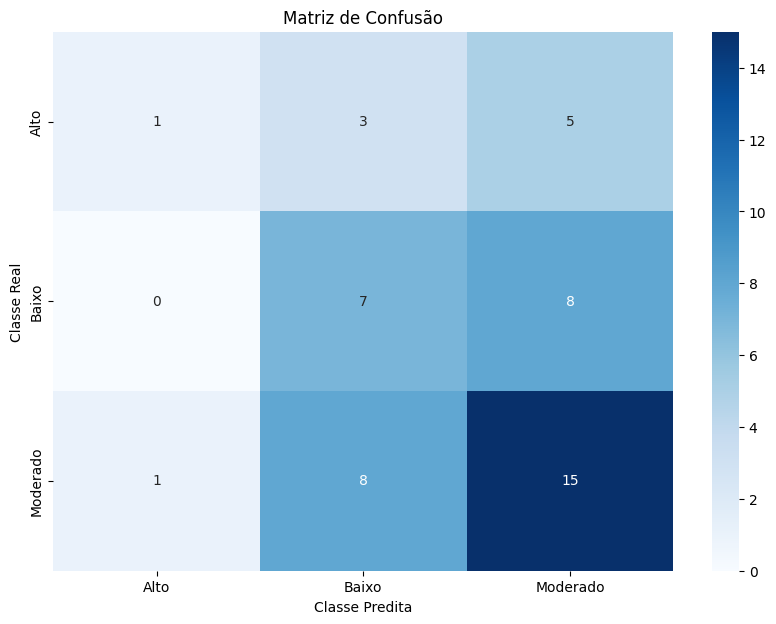

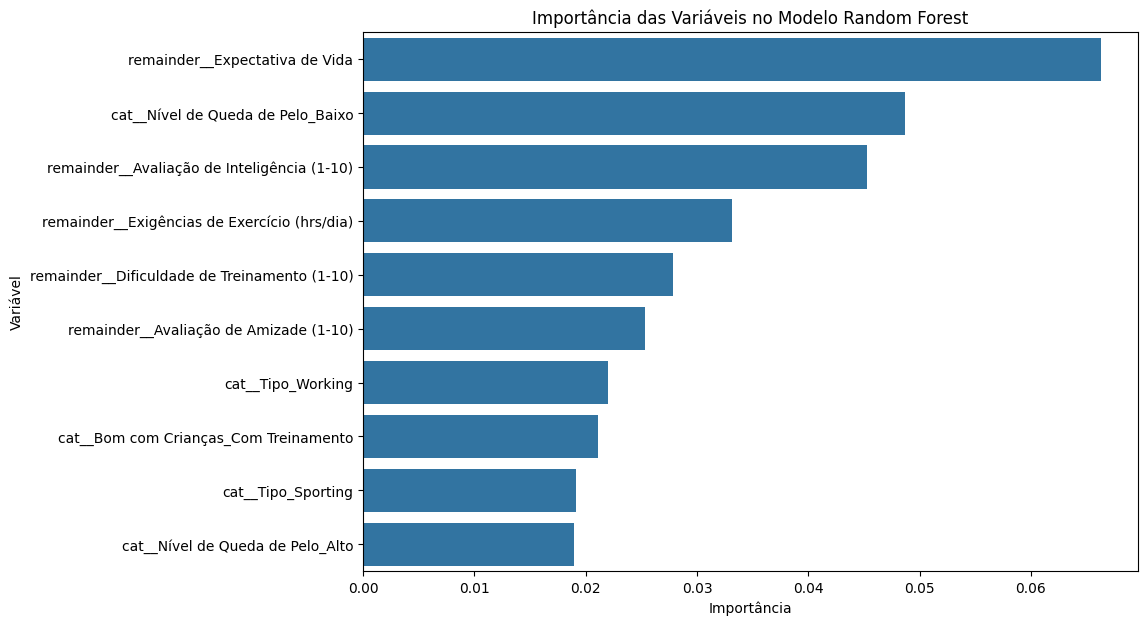

In [7]:
# Importar as bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o conjunto de dados
df = pd.read_csv('/content/Dataset_Racas_Caes_Traduzido.csv')  # Substitua pelo caminho do seu arquivo

# Separar as variáveis independentes (X) e a variável dependente (y)
X = df.drop(columns=['Risco de Problemas de Saúde'])  # Substitua pelo nome da coluna alvo
y = df['Risco de Problemas de Saúde']

# Identificar colunas categóricas
colunas_categoricas = X.select_dtypes(include=['object']).columns.tolist()

# Criar o pré-processador com One-Hot Encoding para variáveis categóricas
preprocessador = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), colunas_categoricas)
    ],
    remainder='passthrough'  # Manter as colunas numéricas inalteradas
)

# Definir o pipeline com o pré-processador e o modelo
pipeline = Pipeline(steps=[
    ('preprocessador', preprocessador),
    ('classificador', RandomForestClassifier(random_state=42))
])

# Definir a grade de hiperparâmetros para o GridSearchCV
param_grid = {
    'classificador__n_estimators': [50, 100, 150],
    'classificador__max_depth': [None, 10, 20, 30],
    'classificador__min_samples_split': [2, 5, 10],
    'classificador__min_samples_leaf': [1, 2, 4]
}

# Configurar o GridSearchCV com o pipeline
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ajustar o modelo aos dados de treinamento
grid_search.fit(X_train, y_train)

# Obter os melhores parâmetros e a melhor pontuação
melhores_parametros = grid_search.best_params_
melhor_score = grid_search.best_score_

# Imprimir os resultados
print("Melhores parâmetros:", melhores_parametros)
print("Melhor pontuação (validação cruzada):", melhor_score)

# Treinar o modelo final com os melhores parâmetros
modelo_final = grid_search.best_estimator_
modelo_final.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = modelo_final.predict(X_test)

# Calcular a acurácia no conjunto de teste
acuracia_teste = accuracy_score(y_test, y_pred)
print("Acurácia no conjunto de teste:", acuracia_teste)

# Gerar o relatório de classificação
relatorio_classificacao = classification_report(y_test, y_pred)
print("Relatório de Classificação:\n", relatorio_classificacao)

# Gerar a matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', xticklabels=modelo_final.classes_, yticklabels=modelo_final.classes_)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

# Obter a importância das variáveis
# Nota: A importância das variáveis pode ser interpretada considerando as variáveis originais antes do One-Hot Encoding
importancia_variaveis = modelo_final.named_steps['classificador'].feature_importances_
nomes_variaveis = modelo_final.named_steps['preprocessador'].get_feature_names_out()
importancia_df = pd.DataFrame({'Variável': nomes_variaveis, 'Importância': importancia_variaveis})
importancia_df = importancia_df.sort_values(by='Importância', ascending=False)

# Plotar a importância das variáveis
plt.figure(figsize=(10, 7))
sns.barplot(x='Importância', y='Variável', data=importancia_df.head(10))
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.title('Importância das Variáveis no Modelo Random Forest')
plt.show()
